# Introduction
In this session, we will delve into more advanced visualizations using the Seaborn library and explore complex questions related to a given dataset.

The `seaborn` library is a powerful data visualization library built on top of `matplotlib`, offering a high-level interface for creating visually appealing and informative statistical graphics.

To begin working with `seaborn`, we need to import the library as shown below:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Optional library but suggested to use in DV projects in order to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('carprices.csv', index_col = 'car_ID')
df.head(2)

,symboling,carname,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0


### Example
Count plot
> How many cars of each car body type are present in the car prices dataset?

In [7]:
df["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

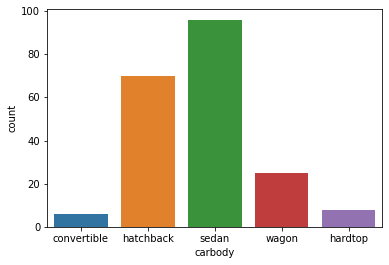

In [10]:
sns.countplot(data = df, x = 'carbody')
plt.show()

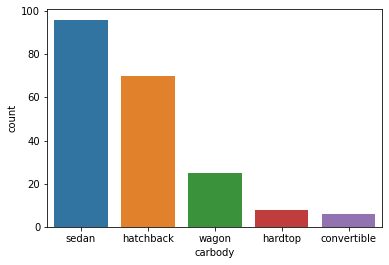

In [11]:
sns.countplot(x = df['carbody'],order=["sedan","hatchback","wagon","hardtop","convertible"])
plt.show()

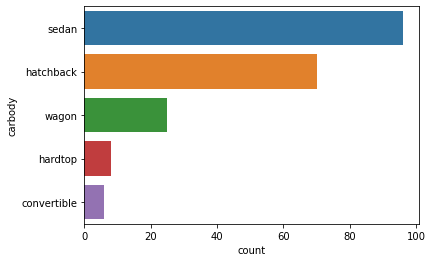

In [12]:
sns.countplot(y = df['carbody'],order=["sedan","hatchback","wagon","hardtop","convertible"])
plt.show()

### Example
Bar graph
> What is the average engine size for each car body type in the car prices dataset?

In [30]:
df.groupby("carbody")["enginesize"].mean()

carbody
convertible    157.166667
hardtop        176.250000
hatchback      114.400000
sedan          130.822917
wagon          123.840000
Name: enginesize, dtype: float64

In [31]:
df[df["carbody"]=="convertible"]["enginesize"]

car_ID
1      130
2      130
73     234
129    194
173    146
190    109
Name: enginesize, dtype: int64

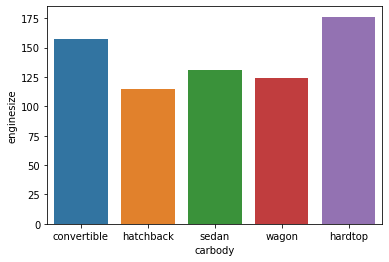

In [32]:
sns.barplot(x=df["carbody"],y=df["enginesize"],estimator=np.mean,ci=None)
plt.show()
# by default estimator is mean

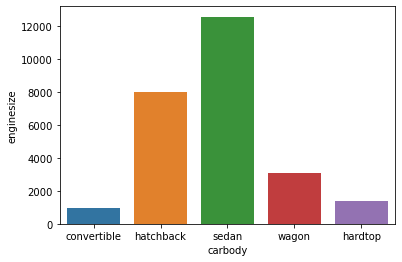

In [33]:
sns.barplot(x=df["carbody"],y=df["enginesize"],estimator=np.sum,ci=None)
plt.show()
# by default estimator is mean

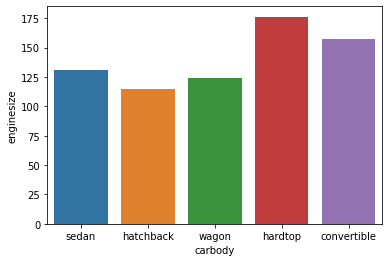

In [29]:
# try hue in barplot with column doornumber
sns.barplot(x=df["carbody"],y=df["enginesize"],estimator=np.mean,ci=None,
            order=["sedan","hatchback","wagon","hardtop","convertible"])
plt.show()

### Example
Line plot
> How have the stock prices of Amazon varied over the years as per the data in the AMZN stocks dataset?

In [34]:
ap = pd.read_csv('AirPassengers.csv')
ap.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [35]:
ap=ap.set_index("Month")

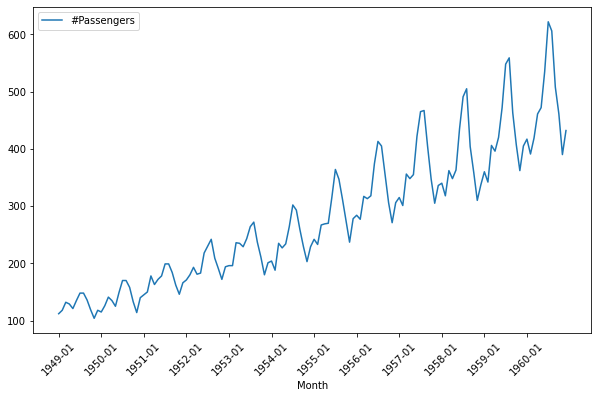

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(data=ap)
plt.xticks(range(0, 144,12),rotation=45)
plt.show()

### Example
Box plots for a single numerical variable
> What is the distribution of city mileage per gallon (citympg) in the dataset?

In [52]:
df["citympg"].describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

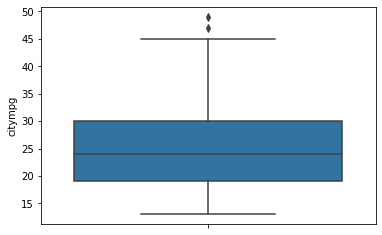

In [49]:
sns.boxplot(y=df["citympg"])
plt.show()
# Left Side of the box: 25th Percentile of the distribution
# Middle line of the box: 50th Percentile of the distribution
# Right Side of the box: 75th Percentile of the distribution
# Handles/Whiskers (Range)
# Blackdots: Outliers (Extreme Values)

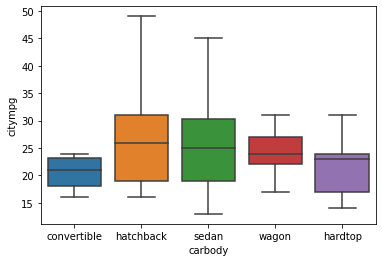

In [50]:
sns.boxplot(x=df["carbody"],y=df["citympg"])
plt.show()

In [51]:
# try to do the same thing with carbody and price

### Quiz
Use a box plot to answer the following question pertaining to the `qdf` dataframe:
> What is the distribution of expenditure split over cuisine?

In [52]:
qdf=pd.read_csv("Buffet_Details.csv")
qdf.head()

,Room,Name,Age,Cuisine,Expenditure
0,A1,Shilpa,18,Indian,24.65
1,A2,Jaspreet,32,American,18.54
2,A3,Dominic,19,Indian,27.66
3,A4,Ahmad,22,American,19.54
4,A5,Joseph,28,Indian,17.32


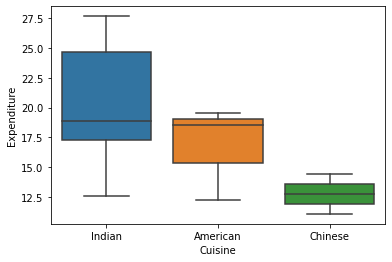

In [53]:
sns.boxplot(x=qdf["Cuisine"],y=qdf["Expenditure"])
plt.show()

### Example
Heat map
> Is there any correlation between numerical variables in the car prices dataset?

In [56]:
df.head()
num_cols=["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke"
         ,"compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

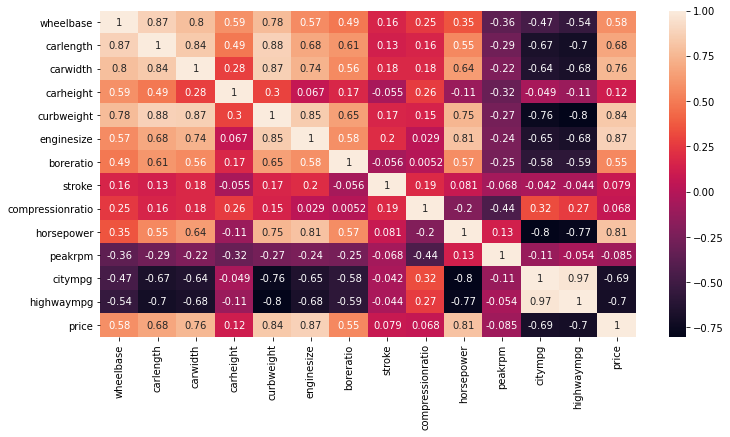

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

In [ ]:
# Correlation represents the strength of relationship between two variables
# Correlation lies in the range of -1 to 1
# Correlation which is in range of -1 to 0 represents negative correlation (inverse)
# Correlation which is in range of 0 to 1 represents positive correlation (direct)
# Correlation equal to 0 represents no relationship

In [ ]:
!pip install --upgrade seaborn